# Introducción a Sistemas de inferencia difusos (SID)
Los sistemas de inferencia difusos, son sistemas de control que operan valores de entrada certeros en universos difusos para obtener salidas certeras.

## Implementación de un SID de tipo Mamdani

### Librerías y utilidades

In [1]:
# Librerías
import math
import numpy as np
from matplotlib import pyplot as plt

def buscarIndiceCercano(x, array):
    # calculate the difference array
    difference_array = np.absolute(array - x)
     
    # find the index of minimum element from the array
    return difference_array.argmin()

#### Funciones de conjuntos difusos

In [2]:
# a: pendiente
# c: desplazamiento
def sigmoide(x, a = 2, c = 0):
    return 1 / (1 + math.e ** (-a * (x - c)))

# a: amplitud
# b: ancho de la campana
# c: desplazamiento
def campana(x, a = 1, b = 3, c = 0):
    return 1/(1 + abs((x-c)/a)**(2*b))

#### Imprimir

In [3]:
# Imprimir
def plotArrayUniverse(universe, array, color, label, lw = 1.5, ls = "-", universe_lbl="x"):
    plt.plot(universe, array, color=color, label=label, linewidth=lw, linestyle=ls)
    
    plt.xlabel(universe_lbl)
    plt.ylabel('\u03bc')
    plt.legend(loc='best')
    plt.grid(True)

def plotArrayX(array, color, label, lw = 1.5, ls = "-"):
    plotArrayUniverse(x, array, color, label, lw=lw, ls=ls)

## Paleta 3 colores
def plot1(u, a, str = 'Frio'):
    plotArrayUniverse(u, a, 'midnightblue', str, lw=3)

def plot2(u, b, str = 'Templado'):
    plotArrayUniverse(u, b, 'slateblue', str, lw=3)

def plot3(u, c, str = 'Caliente'):
    plotArrayUniverse(u, c, 'mediumpurple', str, lw=3)


## A, B y C
def plotA(universe, str = 'A'):
    plot1(universe, a, str=str)

def plotB(universe, str = 'B'):
    plot2(universe, b, str=str)

def plotC(universe, str = 'C'):
    plot3(universe, c, str=str)

# UNIVERSOS
## X
def plotX1(str = 'Frio'):
    plot1(x, x1, str=str)

def plotX2(str = 'Templado'):
    plot2(x, x2, str=str)

def plotX3(str = 'Caliente'):
    plot3(x, x3, str=str)

def plotX():
    plt.title("Universo X")
    plotX1()
    plotX2()
    plotX3()

## Y
def plotY1(str = 'Nada de ejercicio'):
    plot1(y, y1, str=str)

def plotY2(str = 'Ejercio normal'):
    plot2(y, y2, str=str)

def plotY3(str = 'Mucho ejercicio'):
    plot3(y, y3, str=str)

def plotY():
    plt.title("Universo Y")
    plotY1()
    plotY2()
    plotY3()
    plt.xlabel("y")

## Z
def plotZ1(str = 'Hidratarse poco'):
    plot1(z, z1, str=str)

def plotZ2(str = 'Hidratarse mucho'):
    plot3(z, z2, str=str)

def plotZ3(str = 'Hidratarse normal'):
    plot2(z, z3, str=str)

def plotZ():
    plt.title("Universo Z")
    plotZ1()
    plotZ2()
    plotZ3()
    plt.xlabel("z")


### Universos de entrada y salida

In [4]:
# Entrada
## Universo X (x temperatura promedio a la hora del ejercicio)
x_0 = 0
x_d = 50
x_s = x_d/200
x = np.arange(x_0,x_0 + x_d + x_s,x_s)

## Universo Y (y minutos de ejercicio)
y_0 = 0
y_d = 125
y_s = y_d/200
y = np.arange(y_0,y_0 + y_d + y_s,y_s)

## Universo Z (tomar z litros de agua)
z_0 = 0
z_d = 3
z_s = z_d/200
z = np.arange(z_0,z_0 + z_d + z_s, z_s)

### Conjuntos de entrada

#### Universo X

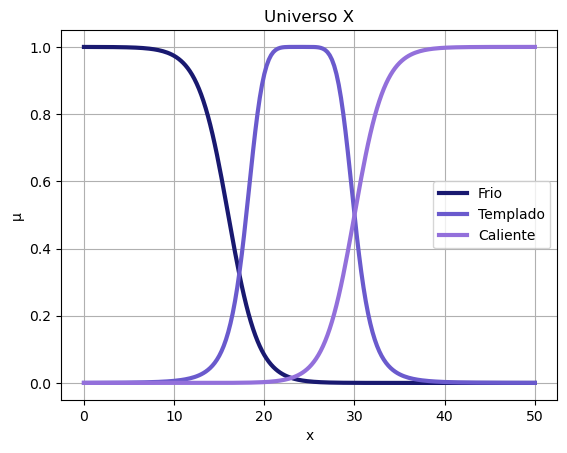

In [5]:
## x1: Baja
x1 = sigmoide(-x+16,a=0.6)

## x2: Templado
x2 = campana(x-24,a=6,b=3)

## x3: Caliente
x3 = sigmoide(x-30, a=0.6)

plotX()

#### Universo Y

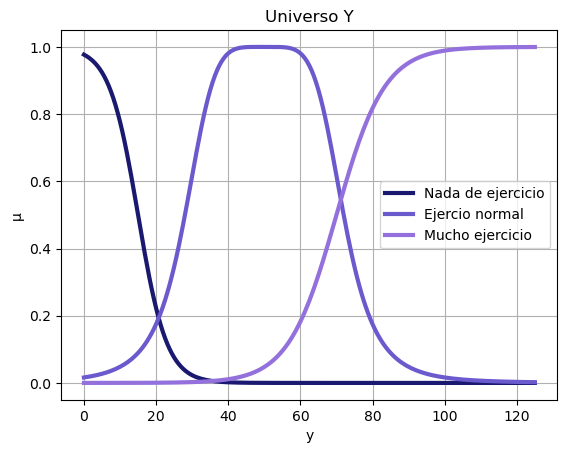

In [6]:
## y1: Nada de ejercicio
y1 = sigmoide(-y+15,a=0.25)

## y2: Ejercicio normal
y2 = campana(y-50,a=22,b=2.5)

## y3: Mucho ejercicio
y3 = sigmoide(y-70, a=0.15)

plotY()

#### Universo Z

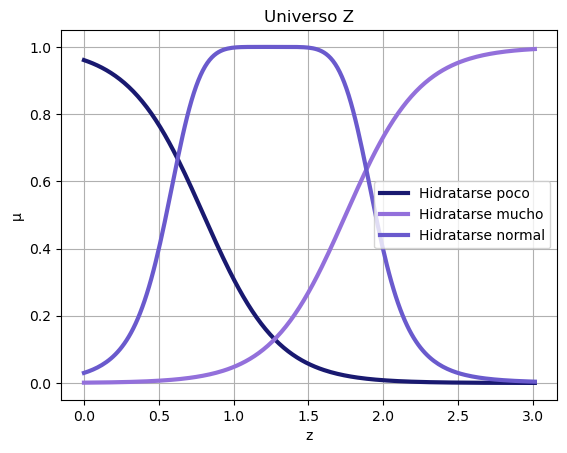

In [7]:
## z1: Hidratarse poco
z1 = 1-sigmoide(z-0.8,a=4)

## z2: Hidratarse mucho
z2 = sigmoide(z-1.75,a=4)

## z3: Hidratarse normal
z3 = campana(z,c=1.25,a=0.7)

plotZ()

### Tabla de inferencia

In [8]:

def difusificar(p_x,p_y):
    mu_x1 = x1[buscarIndiceCercano(p_x, x)]
    mu_x2 = x2[buscarIndiceCercano(p_x, x)]
    mu_x3 = x3[buscarIndiceCercano(p_x, x)]

    mu_y1 = y1[buscarIndiceCercano(p_y, y)]
    mu_y2 = y2[buscarIndiceCercano(p_y, y)]
    mu_y3 = y3[buscarIndiceCercano(p_y, y)]

    return {
        "mu_x":[mu_x1,mu_x2,mu_x3],
        "mu_y":[mu_y1,mu_y2,mu_y3]
    }

def aplicarReglas(mus):
    max_z1 = 0
    max_z2 = 0
    max_z3 = 0
## Si x1 y y1, entonces z1
    max_z1 = np.maximum(max_z1, np.minimum(mus["mu_x"][0],mus["mu_y"][0]))
## Si x2 y y1, entonces z1
    max_z1 = np.maximum(max_z1, np.minimum(mus["mu_x"][1],mus["mu_y"][0]))
## Si x3 y y1, entonces z3
    max_z3 = np.maximum(max_z3, np.minimum(mus["mu_x"][2],mus["mu_y"][0]))
## Si x1 y y2, entonces z3
    max_z3 = np.maximum(max_z3, np.minimum(mus["mu_x"][0],mus["mu_y"][1]))
## Si x2 y y2, entonces z3
    max_z3 = np.maximum(max_z3, np.minimum(mus["mu_x"][1],mus["mu_y"][1]))
## Si x3 y y2, entonces z2
    max_z2 = np.maximum(max_z2, np.minimum(mus["mu_x"][2],mus["mu_y"][1]))
## Si x1 y y3, entonces z2
    max_z2 = np.maximum(max_z2, np.minimum(mus["mu_x"][0],mus["mu_y"][2]))
## Si x2 y y3, entonces z2
    max_z2 = np.maximum(max_z2, np.minimum(mus["mu_x"][1],mus["mu_y"][2]))
## Si x3 y y3, entonces z2
    max_z2 = np.maximum(max_z2, np.minimum(mus["mu_x"][2],mus["mu_y"][2]))

    z1_recortado = np.minimum(z1,max_z1)
    z2_recortado = np.minimum(z2,max_z2)
    z3_recortado = np.minimum(z3,max_z3)
    return {"z1":z1_recortado,"z2":z2_recortado,"z3":z3_recortado}

def desdifusificar(zetas):
    # TODO centroide
    zc = np.maximum(zetas["z1"], zetas["z2"])
    zc = np.maximum(zc, zetas["z3"])
    zponderado = z*zc
    return np.sum(zponderado)/np.sum(zc)

1.6886282143836349


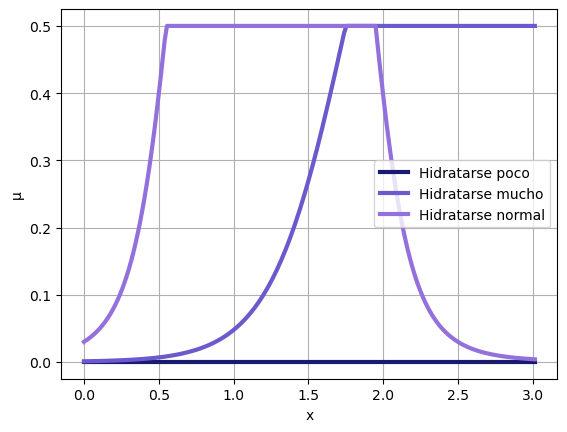

In [9]:
zetas=aplicarReglas(difusificar(30,70))
plot1(z, zetas["z1"], str="Hidratarse poco")
plot2(z, zetas["z2"], str="Hidratarse mucho")
plot3(z, zetas["z3"], str="Hidratarse normal")
print(desdifusificar(zetas))

In [10]:
xx, yy = np.meshgrid(x,y)
Matrix = np.ndarray([len(x),len(y)])


for i in range(len(xx)):
    for j in range(len(yy)):
        Matrix[i][j] = desdifusificar(aplicarReglas(difusificar(xx[i][j],yy[i][j])))

Text(0.5, 0.5, 'Minutos de ejercicio')

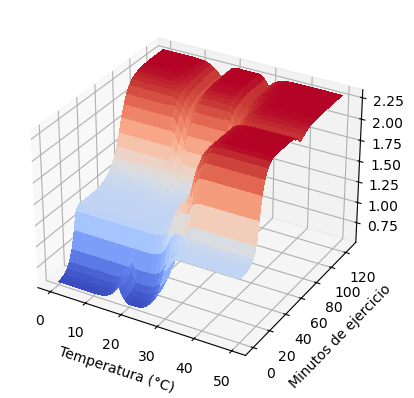

In [11]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, Matrix, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.xlabel("Temperatura (°C)")
plt.ylabel("Minutos de ejercicio")
# ax.zaxis.set_label("Litros de agua a tomar")